In [1]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, confusion_matrix, classification_report, roc_curve,auc

In [2]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv(r'D:\Lets Go\Data Learning Fall 2021\Twitter API\big tweet dataset.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
dataset.sample(5)
dataset['target'] = dataset['target'].replace(4,1)

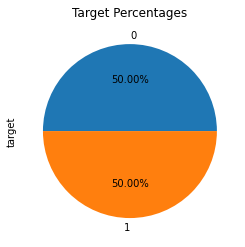

In [3]:
# check distribution of target
dataset['target'].value_counts().plot(kind = 'pie',title='Target Percentages',autopct='%1.2f%%')
plt.show()

In [4]:
dataset['text'] = dataset['text'].str.lower()
dataset['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [5]:
stops = set(stopwords.words('english'))

In [6]:
def remove_stops(text):
    return " ".join([word for word in str(text).split() if word not in stops])
dataset['text'] = dataset['text'].apply(lambda x: remove_stops(x))
dataset['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, behaving all. i'm mad. he...
Name: text, dtype: object

In [7]:
def convert_emotes(text):
    happy = [':)','(:',':D',';)','(;',';D',':‑)',':-]',':]',':-3',':3',':->',':>','8-)',':^)',':*)']
    sad = [':(','):','D:',';(',');','>:(',':-(',':,(',':[',':-[',':-<',':<','D;','8-(','8(',':*(']
    happy_matches = [x for x in happy if x in text.split(' ')]
    sad_matches = [y for y in sad if y in text.split(' ')]
    if len(happy_matches)>0:
        text = re.sub(re.escape(happy_matches[0]),'happy',text)
    if len(sad_matches)>0:
        text = re.sub(re.escape(sad_matches[0]),'sad',text)
    return text
dataset['text'] = dataset['text'].apply(lambda x: convert_emotes(x))
dataset['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    upset can't update facebook texting it... migh...
2    @kenichan dived many times ball. managed save ...
3                     whole body feels itchy like fire
4    @nationwideclass no, behaving all. i'm mad. he...
Name: text, dtype: object

In [8]:
import string
english_puncts = string.punctuation
punct_list = english_puncts
def clean_punct(text):
    trans = str.maketrans('','',punct_list)
    return text.translate(trans)
dataset['text'] = dataset['text'].apply(lambda x: clean_punct(x))
dataset['text'].head()

0    switchfoot httptwitpiccom2y1zl  awww thats bum...
1    upset cant update facebook texting it might cr...
2    kenichan dived many times ball managed save 50...
3                     whole body feels itchy like fire
4    nationwideclass no behaving all im mad here ca...
Name: text, dtype: object

In [9]:

def clean_urls(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))','',data)
dataset['text'] = dataset['text'].apply(lambda x: clean_urls(x))
dataset['text'].head()


0    switchfoot httptwitpiccom2y1zl  as bummer shou...
1    upset cant update facebook texting it might cr...
2    kenichan dived many times ball managed save 50...
3                     whole body feels itchy like fire
4    nationwideclass no behaving all im mad here ca...
Name: text, dtype: object

In [10]:
def clean_nums(data):
    return re.sub('[0-9]+','',data)
dataset['text'] = dataset['text'].apply(lambda x: clean_nums(x))
dataset['text'].head()

0    switchfoot httptwitpiccomyzl  as bummer should...
1    upset cant update facebook texting it might cr...
2    kenichan dived many times ball managed save  r...
3                     whole body feels itchy like fire
4    nationwideclass no behaving all im mad here ca...
Name: text, dtype: object

In [11]:
dataset['text'] = dataset['text'].apply(lambda x: word_tokenize(x))
dataset['text'].head()

0    [switchfoot, httptwitpiccomyzl, as, bummer, sh...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, behaving, all, im, mad, ...
Name: text, dtype: object

In [12]:
lm = WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

0    [switchfoot, httptwitpiccomyzl, as, bummer, sh...
1    [upset, cant, update, facebook, texting, it, m...
2    [kenichan, dived, many, times, ball, managed, ...
3              [whole, body, feels, itchy, like, fire]
4    [nationwideclass, no, behaving, all, im, mad, ...
Name: text, dtype: object

In [13]:
dataset['text'] = dataset['text'].astype(str)
X = dataset['text'].values
y = dataset['target'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state =26105111)

In [15]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0,
                max_features=500000, min_df=1, ngram_range=(1, 2), norm='l2',
                preprocessor=None, smooth_idf=True, stop_words=None,
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [16]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [17]:
#Function to evaluate model
def model_eval(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print ('Training accuracy: %.4f' % model.score(X_train, y_train))
    print ('Training f-1 score: %.4f' % f1_score(y_train, model.predict(X_train)))
    print ('Test accuracy: %.4f' % model.score(X_test, y_test))
    print ('Test f-1 score: %.4f' % f1_score(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    cf_matrix = confusion_matrix(y_test,y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Training accuracy: 0.8265
Training f-1 score: 0.8297
Test accuracy: 0.7828
Test f-1 score: 0.7868
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     80200
           1       0.77      0.80      0.79     79800

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000



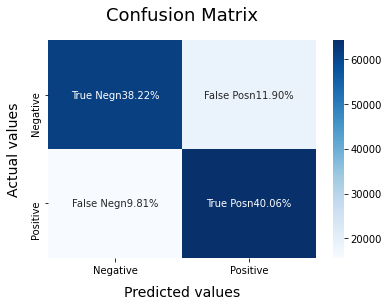

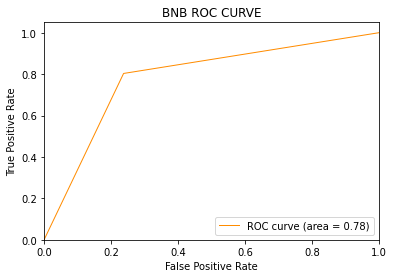

In [18]:
bnb = BernoulliNB()
model_eval(bnb)
y_pred = bnb.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BNB ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Training accuracy: 0.8929
Training f-1 score: 0.8939
Test accuracy: 0.7830
Test f-1 score: 0.7851
              precision    recall  f1-score   support

           0       0.79      0.77      0.78     80200
           1       0.78      0.79      0.79     79800

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000



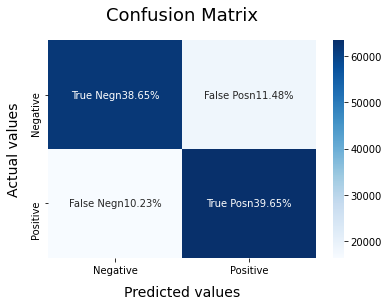

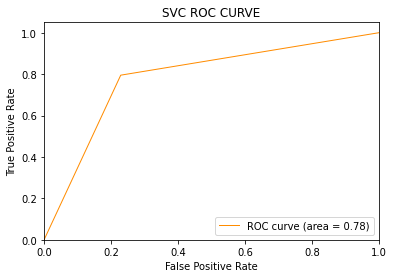

In [19]:
# Commenting out SVC cause it takes a while
'''
svc = LinearSVC(max_iter=10000)
model_eval(svc)
y_pred = svc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC CURVE')
plt.legend(loc="lower right")
plt.show()
'''

Training accuracy: 0.8551
Training f-1 score: 0.8570
Test accuracy: 0.7961
Test f-1 score: 0.7987
              precision    recall  f1-score   support

           0       0.81      0.78      0.79     80200
           1       0.79      0.81      0.80     79800

    accuracy                           0.80    160000
   macro avg       0.80      0.80      0.80    160000
weighted avg       0.80      0.80      0.80    160000



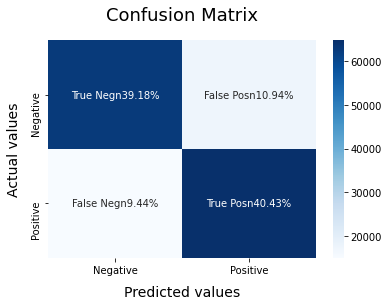

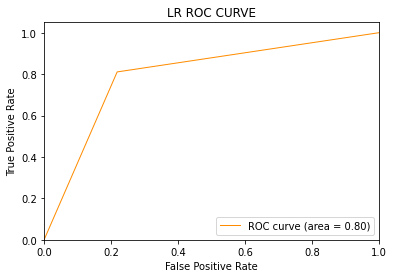

In [20]:
lr = LogisticRegression(C = 2, max_iter = 10000)
model_eval(lr)
y_pred = lr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Training accuracy: 0.8949
Training f-1 score: 0.8959
Test accuracy: 0.7680
Test f-1 score: 0.7706
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     80200
           1       0.76      0.78      0.77     79800

    accuracy                           0.77    160000
   macro avg       0.77      0.77      0.77    160000
weighted avg       0.77      0.77      0.77    160000



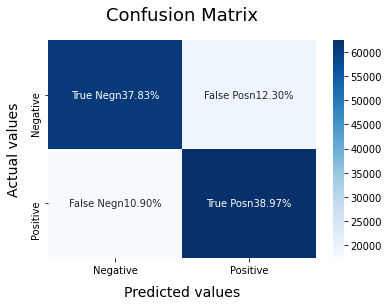

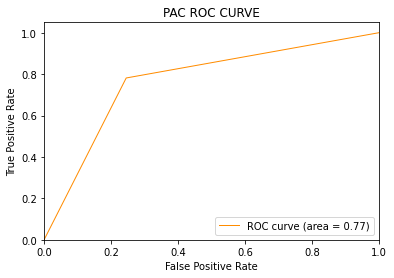

In [21]:
pac = PassiveAggressiveClassifier(C=0.5,max_iter=5000,early_stopping=True, n_iter_no_change=10,loss='hinge')
model_eval(pac)
y_pred = pac.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PAC ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [22]:
#Train Logistic Regression on all data
X = vectorizer.fit_transform(X)
lr = LogisticRegression(C = 2, max_iter = 10000)
lr.fit(X,y)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Saving Model using joblib

In [23]:
import joblib

In [24]:
joblib.dump(lr,'lrmodel.pkl')
joblib.dump(vectorizer, 'vect.pkl')

['vect.pkl']